<a href="https://colab.research.google.com/github/MariaOs02/LabBiosenales/blob/main/Neurokit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NEUROKIT 2
Neurokit2 es una herramienta de python para realizar el procesamiento de señales neurofisiológicas para analizar datos fisiológicos. En este mini tutorial mostraremos los pasos a seguir para realizar un correcto flujo de procesamiento con su debido ejemplo:

- **Instalación**
##### Desde el terminal ejecutar comando de instalación
- **Importar bibliotecas**
##### Neurokit2 y demas necesarias para el analisis
- **Obtener datos de las bioseñales**
##### - *ecg_simulate(duracion,frecuencia de muestreo, metodo)*: Neurokit2 tiene una función de generación de señal ECG de forma artificial simulando su forma general basado en wavelets de Daubechies.
##### - Cargar datos propios obtenidos del dataset
- **Función integrada para procesar y analizar señales**
(filtros para eliminar ruido, detección de ondas R, extracción de parámetros, entre otros)
##### - *ecg_process(señal, frecuencia de muestreo)*: Procesa la señal, calcula caracteristicas relacionadas con la variabilidad de la frecuencia cardiaca.
##### - *ecg_plot(señal, info)*: Permite visualizar la señal y caracteristicas.
- **Extracción de caracteristicas**
##### - *ecg_intervalrelated(señal, frecuencia de muestreo)*: Realiza analisis de ECG extrayendo datos en un Dataframe de frecuencia cardiaca media (ECG_Rate_Mean) y metricas de variabilidad de F.C (ECG_HRV).
##### - *ecg_peaks(señal, frecuencia de muestreo)*: Identifica los picos R predominantes de esta señal. Muestra puntos específicos donde ocurren estos picos R, identificados con la clave "ECG_R_Peaks"

In [ ]:
pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 15.1 MB/s eta 0:00:00


In [ ]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=UserWarning)  # Para warnings de tipo UserWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)  # Para warnings de tipo RuntimeWarning

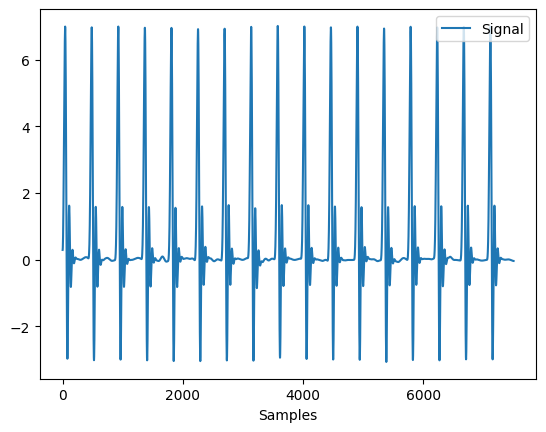

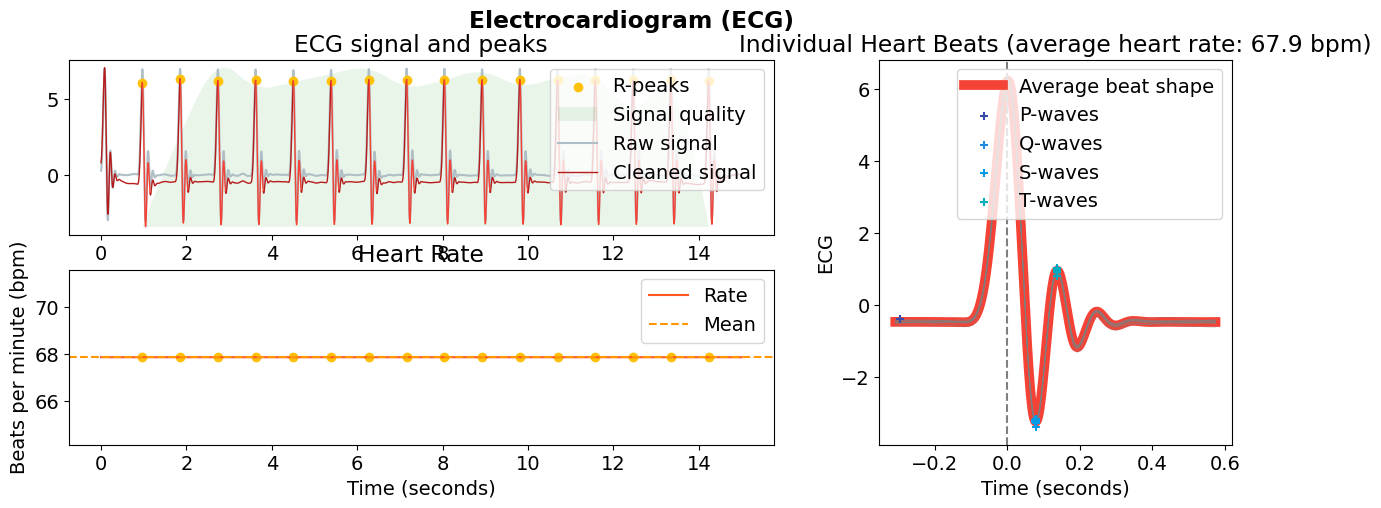

In [ ]:
ecg_signal = nk.ecg_simulate(duration=15, method="simple", sampling_rate=500)
nk.signal_plot(ecg_signal)
signals, info = nk.ecg_process(ecg_signal, sampling_rate=500)
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['font.size']= 14

# Visualizar las ondas detectadas
nk.ecg_plot(signals[:10000],info)

- El número de picos R es equivalente al número de complejos QRS, ya que cada pico R indica el final de un ciclo QRS.

In [ ]:
QRS_count = len(info['ECG_R_Peaks'])
print("QRSCount:", QRS_count)

QRSCount: 16


## ecg_delineate()
Función para delimitar el complejo QRS, es decir, las diferentes ondas de los ciclos cardíacos. Un latido cardíaco típico en un ECG consta de una onda P, un complejo QRS y una onda T. Permite distinguir del incio de la onda del ECG, conociendo el valor inicial (inico del segmento P(azul)) al valor final (terminación del segmento T(roja))
- Promedio de inicializaciones de señal ECG (p_Onsets)
- Promedio de finalizaciones de señal ECG (t_Offsets)


[306, nan, 1160, 1605, 2118, 2525, 3004, 3432, 3869, 4326, 4795, nan, 5587, 6043, nan, nan]
[574, 1016, 1458, 1900, 2342, 2784, 3226, 3668, 4110, 4552, 4994, 5436, 5878, 6320, 6762, 7204]
Promedio de P_Onsets (en s): 4.098627450980392
Promedio de T_Offsets (en s): 4.575294117647059


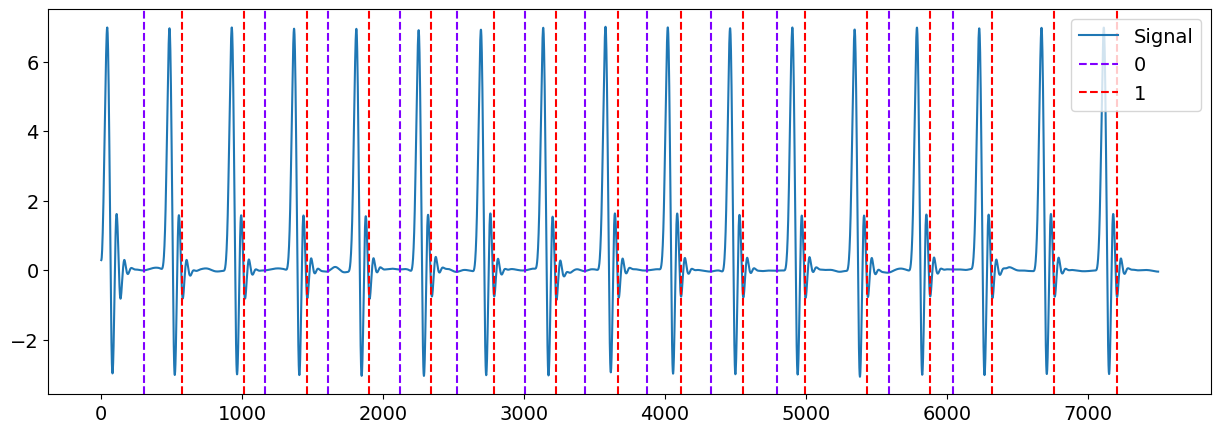

In [ ]:
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=850)

#Delinear ciclo cardiaco
signals, waves = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=850)

inicio = waves["ECG_P_Onsets"]
print(inicio)
fin = waves["ECG_T_Offsets"]
print(fin)
nk.events_plot([inicio, fin], ecg_signal)

# Acceder a los momentos de inicialización de la onda P (ECG_P_Onsets) y finalización de la onda T (ECG_T_Offsets) y Convertir a un array de NumPy
p_onsets = np.array(inicio)
t_offsets = np.array(fin)

# Limpiar los valores eliminando NaN
p_onsets_cleaned = t_offsets[~np.isnan(p_onsets)]
t_offsets_cleaned = t_offsets[~np.isnan(t_offsets)]

sampling_rate = 850  # Frecuencia de muestreo en Hz
p_onsets_sec = p_onsets_cleaned / sampling_rate
t_offsets_sec = t_offsets_cleaned / sampling_rate

# Calcular estadísticas básicas
p_onsets_avg = np.mean(p_onsets_sec)
t_offsets_avg = np.mean(t_offsets_sec)

# Imprimir los resultados
print("Promedio de P_Onsets (en s):", p_onsets_avg)
print("Promedio de T_Offsets (en s):", t_offsets_avg)

- ECG_Rate_Mean: Frecuencia cardíaca media medida en pulsaciones por minuto
- HRV_meanNN: Tiempo promedio entre latidos normales
- HRV_SDNN: Desviación estándar. Variabilidad del ritmo cardíaco
- HRV_RMSSD: Representa la actividad parasimpática (Relajación)

In [ ]:
# Se procesa los datos
df, info = nk.ecg_process(ecg_signal,sampling_rate=300)
nk.ecg_intervalrelated(df,sampling_rate=300)

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,40.729947,[[1473.1111111111109]],[[0.8606629658239096]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[1.2598815766974814]],...,[[0.2006706954621511]],[[0.3533593350214213]],[[0.20069399327273552]],[[nan]],[[nan]],[[nan]],[[3.866849535009425e-17]],[[nan]],[[1.3562071871080221]],[[1.0418374921622717]]


Calcula La frecuencia ventricular promedio de un corazón a partir de los picos R  Y  la frecuencia de los latidos auriculares (tasa auricular) a partir de los picos P de una señal de ECG
- VentricularRate
- Atrial Rate

In [ ]:
R_peaks = info['ECG_R_Peaks']  # Índices de los picos R

# Calcular los intervalos RR (diferencia entre picos R consecutivos)
RR_intervals = np.diff(R_peaks)

# Convertir los intervalos RR a segundos, asumiendo una tasa de muestreo (sampling_rate)
sampling_rate = 500
RR_intervals_sec = RR_intervals / sampling_rate  # Intervalos RR en segundos

# Calcular la frecuencia ventricular (latidos por minuto)
VentricularRate = 60 / RR_intervals_sec

# Promedio de la frecuencia ventricular
VentricularRate = np.mean(VentricularRate)

print("VentricularRate:", VentricularRate)

VentricularRate: 67.88356368188299


In [ ]:
# Paso 1: Asegurarse de que los picos P sean un arreglo de NumPy
p_peaks = np.array(waves['ECG_P_Peaks'])

# Paso 2: Filtrar NaNs
p_peaks_cleaned = p_peaks[~np.isnan(p_peaks)]

# Paso 3: Calcular los intervalos PP
pp_intervals = np.diff(p_peaks_cleaned)/500  # Suponiendo tasa de muestreo de 500 Hz
# Paso 4: Calcular la tasa atrial (Atrial Rate)
atrial_rate = 60 / np.mean(pp_intervals)  # Frecuencia en latidos por minuto (bpm)

# Mostrar el Atrial Rate
print("Atrial Rate:", atrial_rate)

Atrial Rate: 58.016877637130804


Cuántas muestras del ECG corresponden a cada fase Ventricular
- Sístole(PhaseVentricularSystolic)- Contracción
- Diástole(PhaseVentricularDiastolic)-Relajación


In [ ]:
cardiac_phase = nk.ecg_phase(ecg_signal,rpeaks,waves, sampling_rate=1000)

# Extraer la fase ventricular del DataFrame
ventricular_phase = cardiac_phase["ECG_Phase_Ventricular"].values

# Limpiar los datos de NaN o valores no válidos
ventricular_phase_cleaned = ventricular_phase[~np.isnan(ventricular_phase)]

# Crear dos variables separadas para sístole (1)
systole_phase = ventricular_phase_cleaned[ventricular_phase_cleaned == 1]  # Sístole (fase 1)

# Obtener estadísticas básicas de cada fase
systole_count = len(systole_phase)

# Imprimir resultados
print("PhaseVentricularSystolic:", systole_count)

diastole_phase = ventricular_phase_cleaned[ventricular_phase_cleaned == 0]  # Diástole (fase 0)
diastole_count = len(diastole_phase)
print("PhaseVentricularDiastolic:", diastole_count)


PhaseVentricularSystolic: 1440
PhaseVentricularDiastolic: 5281
